In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
dataset = dataset.drop(['Serial No.'],axis=1)

In [6]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


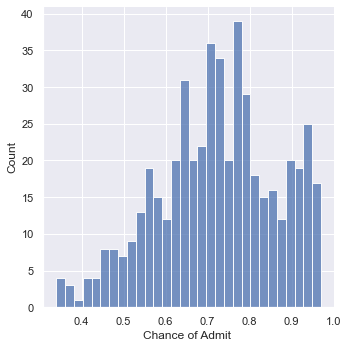

In [7]:
sns.set(rc = {'figure.figsize' : (11.7,8.27)})
sns.displot(dataset['Chance of Admit '],bins=30)
plt.show()

In [8]:
#Removing outliers
dataset.drop(dataset.index[list((np.where(dataset['Chance of Admit ']<0.4)))],inplace=True)

c:\users\piyush\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


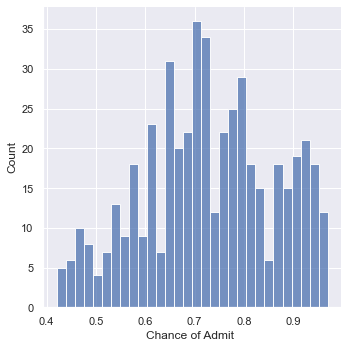

In [9]:
#after removing outliers
sns.set(rc = {'figure.figsize' : (11.7,8.27)})
sns.displot(dataset['Chance of Admit '],bins=30)
plt.show()

<AxesSubplot:>

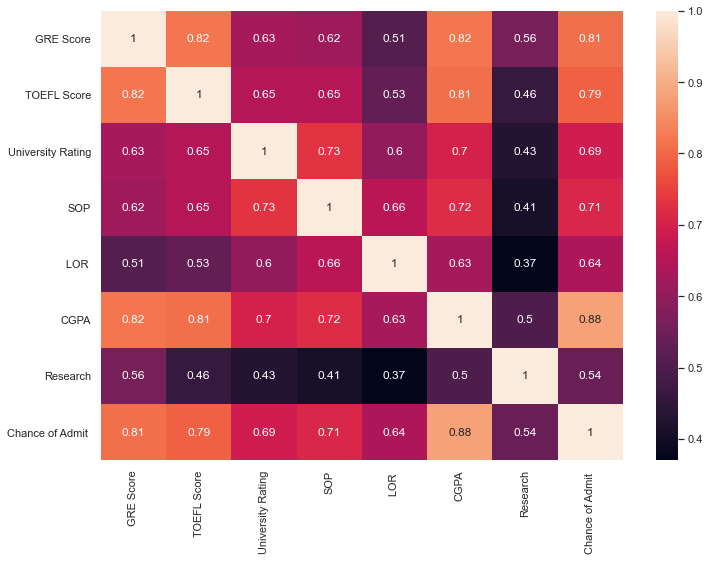

In [10]:
corr_mat = dataset.corr().round(2)
sns.heatmap(data = corr_mat,annot=True)

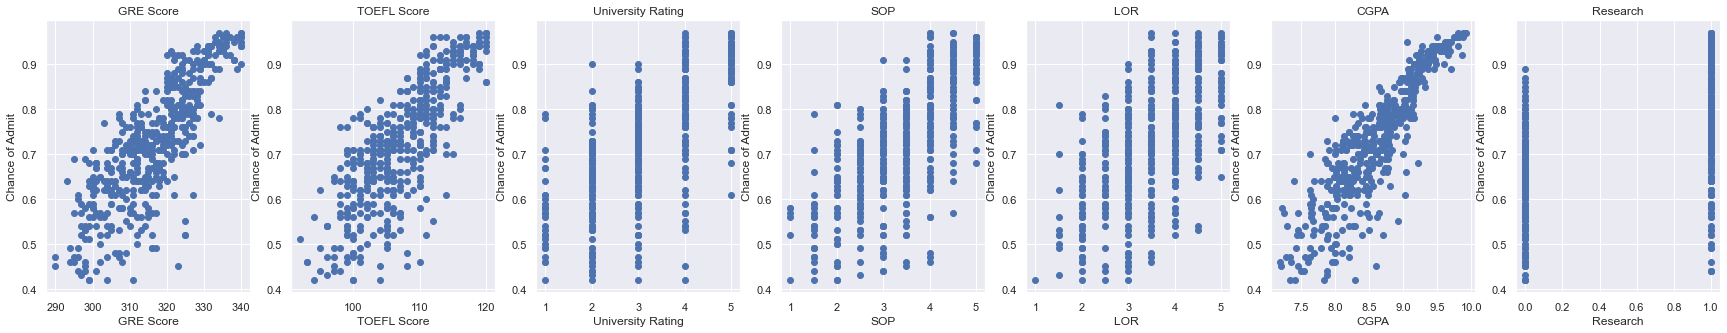

In [11]:
# WE CAN SEE GRE SCORE , TOEFL SCORE, AND CGPA ARE HAVING POSITIVE COLINEARITY.
#Scatter plot
plt.figure(figsize = (30,5))

features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
target = dataset['Chance of Admit ']
for i, col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = dataset[col]
    y = target
    plt.scatter (x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Chance of Admit")

In [12]:
x = dataset.iloc[:,:7]
y = dataset['Chance of Admit ']

In [13]:
#Splitting data fro training and testing
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 5)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
#Finding MSE, RMSE, R2 Score
y_test_predict = lr.predict(X_test)
mse = mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test,y_test_predict))
r2 = r2_score(y_test,y_test_predict)

print("The model performance for training set is: \n")
print("RMSE is {}".format(rmse))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("\n")

The model performance for training set is: 

RMSE is 0.05948379719688705
MSE is 0.0035383221289603884
R2 score is 0.7945911356309248




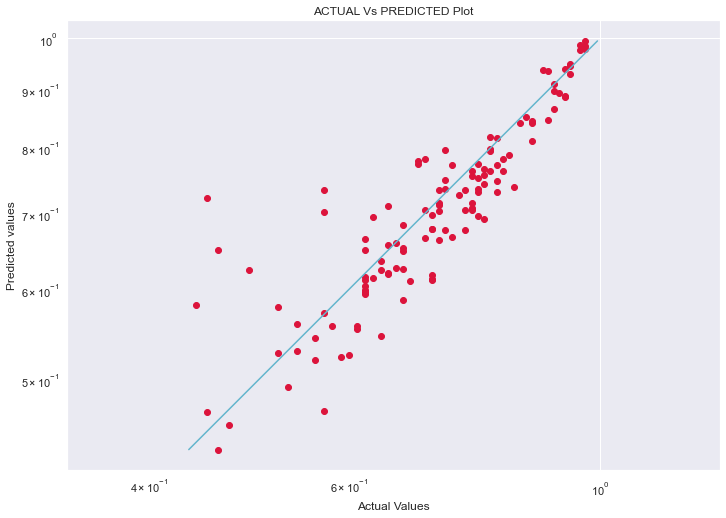

In [15]:
#Plotting graph between 
plt.scatter(y_test,y_test_predict,color ='crimson')
plt.xscale('log')
plt.yscale('log')
point1 = max(max(y_test_predict),max(y_test))
point2 = min(min(y_test_predict),min(y_test))
plt.plot([point1,point2],[point1,point2],'c-')
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.axis('equal')
plt.title("ACTUAL Vs PREDICTED Plot")
plt.show()